# Fig.1 - Single- and Double-Resistant Genotype Trends (w/ 3x2 subpanels)

Change plot's default size and font

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]
rc = {"font.family" : "sans-serif", 
      "font.style" : "normal",
      "mathtext.fontset" : "dejavusans"}
plt.rcParams.update(rc)
plt.rcParams["font.sans-serif"] = ["Myriad Pro"] + plt.rcParams["font.sans-serif"]

You need to define these variables each run to reflect certain drug coverage settings.

In [2]:
# path to 100 simulation outputs
file_path_adpcyc = 'raw_data/set7_ac/monthly/set7ac_%smonthly_data_0.txt'
# path to ac outputs, with alternative initial genotypes
file_path_aac = 'raw_data/alt_init_geno/set7_aac/monthly/set7aac_%smonthly_data_0.txt'
# filepath to save the output plot to
plot_savepath = 'generated_figures/set7_ac_fig1.svg'

Read in all 100 simulations as df to show variations and to compute IQR

In [3]:
from constant import REPORTDAYS, HEADER_NAME, COLUMNS_TO_DROP
import pandas as pd

In [4]:
dflist = []
for i in range(1,101):
  dflist.append(pd.read_csv(file_path_adpcyc % i, index_col=False, \
                            names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP))

In [5]:
dflist_aac = []
for i in range(1,101):
  dflist_aac.append(pd.read_csv(file_path_aac % i, index_col=False, \
                            names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP))

Plot

In [6]:
TITLE_FONTSIZE = 18
XLABEL_FONTSIZE = 15

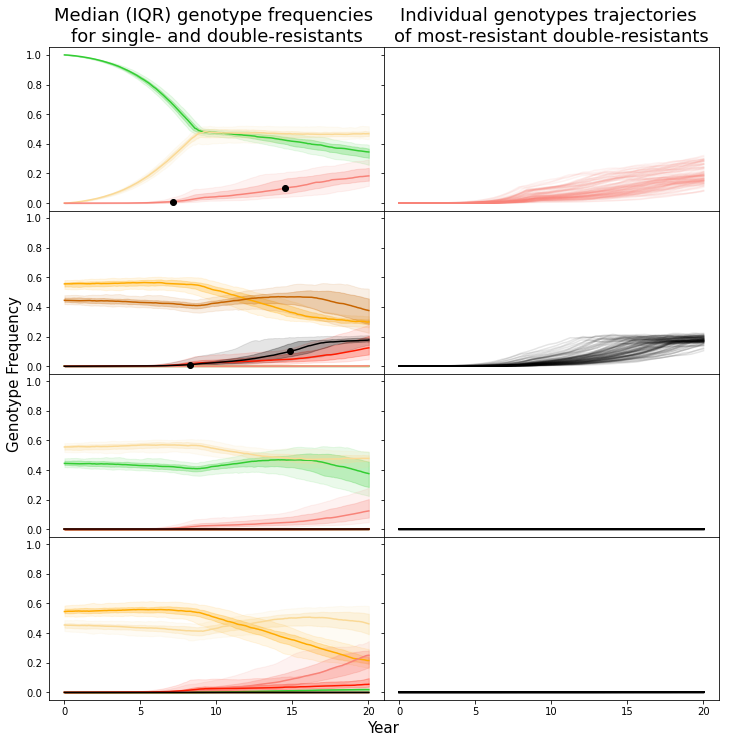

In [7]:
# prepare plt for 4x2 subpanels
from plot_helper import xaxis_label_ticker
from plotter import fig1_plot_IQR, fig1_plot_vars
import matplotlib.ticker as ticker
xlocator = 5*365
ticks_x = xaxis_label_ticker()

fig, axs = plt.subplots(4, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')

(ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8) = axs

fig1_plot_IQR(ax1, dflist, 'DHA-PPQ')
fig1_plot_vars(ax2, dflist, 'DHA-PPQ')
fig1_plot_IQR(ax3, dflist, 'ASAQ')
fig1_plot_vars(ax4, dflist, 'ASAQ')
fig1_plot_IQR(ax5, dflist, 'AL')
fig1_plot_vars(ax6, dflist, 'AL')
fig1_plot_IQR(ax7, dflist_aac, 'AL')
fig1_plot_vars(ax8, dflist_aac, 'AL')

ax1.set_title('Median (IQR) genotype frequencies \nfor single- and double-resistants', fontsize=TITLE_FONTSIZE)
ax2.set_title('Individual genotypes trajectories \nof most-resistant double-resistants', fontsize=TITLE_FONTSIZE)

for ax in axs:
  ax[0].set_ylim(-0.05, 1.05)
  ax[1].set_ylim(-0.05, 1.05)

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# add common x- and y-labels
plt.xlabel('Year', fontsize=XLABEL_FONTSIZE)
plt.ylabel('Genotype Frequency', fontsize=XLABEL_FONTSIZE)

ax5.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax5.xaxis.set_major_formatter(ticks_x)
ax6.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax6.xaxis.set_major_formatter(ticks_x)

plt.savefig(fname=plot_savepath, format='svg')
plt.show()